In [ ]:
#Install AutoML library - PyCaret
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Abstract
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. 

The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. The report is a publication of the Sustainable Development Solutions Network, a global initiative of the United Nations.

Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. 


### Objective
* Perform Exploratory Data Analysis
* **Use AutoML - Pycaret Library**
  1. Data Preprocessing
  2. Model Evaluation and Comparison
  3. Hyperpameter Tuning
  4. Blending Multiple Models
* Model Interpretability
  1. Using SHAP
  2. Using LIME
 3. **Compare SHAP and LIME**

In [ ]:
# Importing Packages
import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns
import math 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
from scipy.stats import norm, skew #for some statistics
from scipy import stats

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving TEH_World_Happiness_2015_2019_Imputed.csv to TEH_World_Happiness_2015_2019_Imputed (1).csv


In [ ]:
#Reading the data
df=pd.read_csv("TEH_World_Happiness_2015_2019_Imputed.csv")

In [ ]:
df.head()

Country  Happiness rank  Happiness Score  GDP per capita  \
0  Switzerland               1            7.587         1.39651   
1      Iceland               2            7.561         1.30232   
2      Denmark               3            7.527         1.32548   
3       Norway               4            7.522         1.45900   
4       Canada               5            7.427         1.32629   

   Social support  Healthy life  Freedom  Generosity  Corruption  Year  
0         1.34951       0.94143  0.66557     0.29678     0.41978  2015  
1         1.40223       0.94784  0.62877     0.43630     0.14145  2015  
2         1.36058       0.87464  0.64938     0.34139     0.48357  2015  
3         1.33095       0.88521  0.66973     0.34699     0.36503  2015  
4         1.32261       0.90563  0.63297     0.45811     0.32957  2015

### Data description
This data is just the World Happiness Report https://www.kaggle.com/datasets/unsdsn/world-happiness data with some missing and zero values that were used as missing values were cleaned up using MICE-based imputation.
* **Country** : Name of the country.
* **Happiness rank** : Rank of the country based on the Happiness Score. 
* **Happiness Score** : A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 1 to 10."
* **GDP per capita** : The extent to which GDP contributes to the calculation of the Happiness Score.
* **Social support** : The extent to which Family contributes to the calculation of the Happiness Score
* **Healthy life** : The extent to which Life expectancy contributed to the calculation of the Happiness Score
* **Freedom** : The extent to which Freedom contributed to the calculation of the Happiness Score.
* **Generosity** : The extent to which Generosity contributed to the calculation of the Happiness Score.
* **Corruption** : The extent to which Perception of Corruption contributes to Happiness Score.
* **Year** : The Year on which Happiness Score was measured.

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Min Value'] = df.min().values
    summary['Max Value'] = df.max().values
    summary['Sample Value'] = df.loc[0].values

    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2)
    return summary
resumetable(df)

Dataset Shape: (782, 10)


Name   dtypes  Missing  Uniques    Min Value Max Value  \
0          Country   object        0      170  Afghanistan  Zimbabwe   
1   Happiness rank    int64        0      158            1       158   
2  Happiness Score  float64        0      716        2.693     7.769   
3   GDP per capita  float64        5      741       0.0153     2.096   
4   Social support  float64        5      731      0.10419     1.644   
5     Healthy life  float64        5      704     0.005565     1.141   
6          Freedom  float64        5      696      0.00589     0.724   
7       Generosity  float64        5      663      0.00199  0.838075   
8       Corruption  float64        7      634        0.001   0.55191   
9             Year    int64        0        5         2015      2019   

  Sample Value  Entropy  
0  Switzerland     2.22  
1            1     2.20  
2        7.587     2.84  
3      1.39651     2.86  
4      1.34951     2.85  
5      0.94143     2.83  
6      0.66557     2.82  
7      0.29678     2.79  
8      0.41978     2.75  
9         2015     0.70

**Observation**:

* There are Happiness score is measured for **170 unique countries** present from the year **2015 to 2019**.
* The Happniess rank is ranging between **1 to 158** and the Happiness Score is ranging between **2.693 to 7.769**.
* Some of the Countries have missing values in the Economic Indicators.

**Entropy** is defined as the randomness or measuring the disorder of the information being processed.

**Action**:
* Impute the missing values using KNN Imputer
* Perform EDA

### Distribution of Happiness Score

In [ ]:
df['Happiness Score'].describe()

count    782.000000
mean       5.379018
std        1.127456
min        2.693000
25%        4.509750
50%        5.322000
75%        6.189500
max        7.769000
Name: Happiness Score, dtype: float64

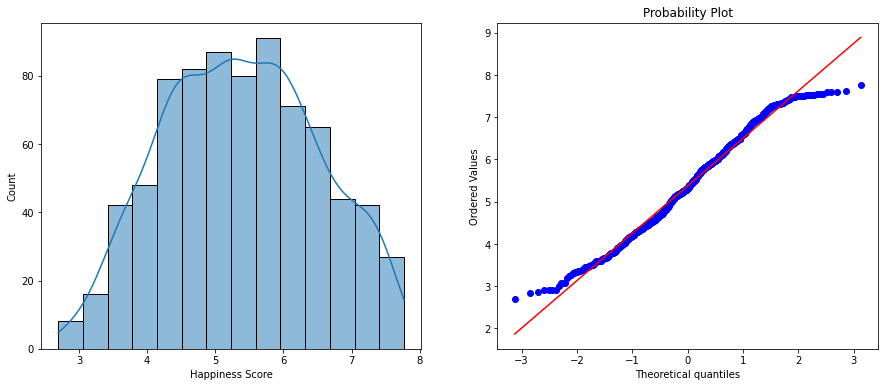

In [ ]:
plot , ax = plt.subplots( 1,2 , figsize = (15 , 6))
g = sns.histplot(df['Happiness Score'] , kde = True , ax = ax[0])
res = stats.probplot(df['Happiness Score'], plot= ax[1])

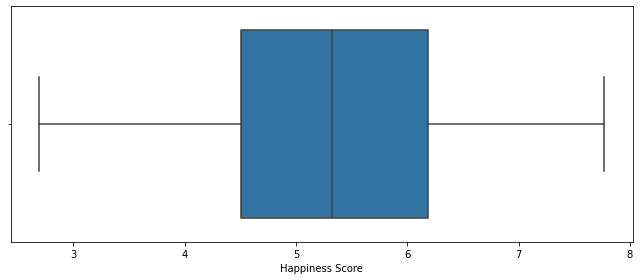

In [ ]:
fig, ax=plt.subplots(figsize=(9,4)) 
sns.boxplot(x=df['Happiness Score'], data=df)

plt.tight_layout() 

**Observation**:
* The Happiness Score is almost following a Normal Distribution with a mean of 5.379018
* We can't see any values beyond the Upper and Lower Whisker(1.5 times the Inter Quartile Range i.e Upper Quartile - Lower quartile)

### Happiness Score across the countries

In [ ]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from chart_studio import plotly 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [dict(type='choropleth',
             locations = df['Country'],
             locationmode = 'country names',
             z = df['Happiness Score'],
             text = df['Country'],
             colorbar = {'title':'Happiness Score'})]
layout = dict(geo=dict(showframe = False,
              projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)
map1.show(renderer='colab')

In [ ]:
country_df=df[['Country','Happiness Score']].groupby('Country').mean().reset_index().sort_values(by='Happiness Score')

In [ ]:
# Countries with highest average Happiness Score
country_df.tail()

Country  Happiness Score
61       Iceland           7.5110
145  Switzerland           7.5114
46       Finland           7.5378
111       Norway           7.5410
38       Denmark           7.5460

In [ ]:
# Countries with lowest average Happiness Score
country_df.head()

Country  Happiness Score
22                    Burundi          3.07900
26   Central African Republic          3.13425
146                     Syria          3.29220
138               South Sudan          3.38250
125                    Rwanda          3.43860

Observation:
* West European Countries have the highest Happiness Score, whereas some of the African countries have lowest Happiness Score. 
* North American Countries and Australia also have a high Hapiness Score, followed by South American and Asian Countries.

### Distribution of the Economic Indicators

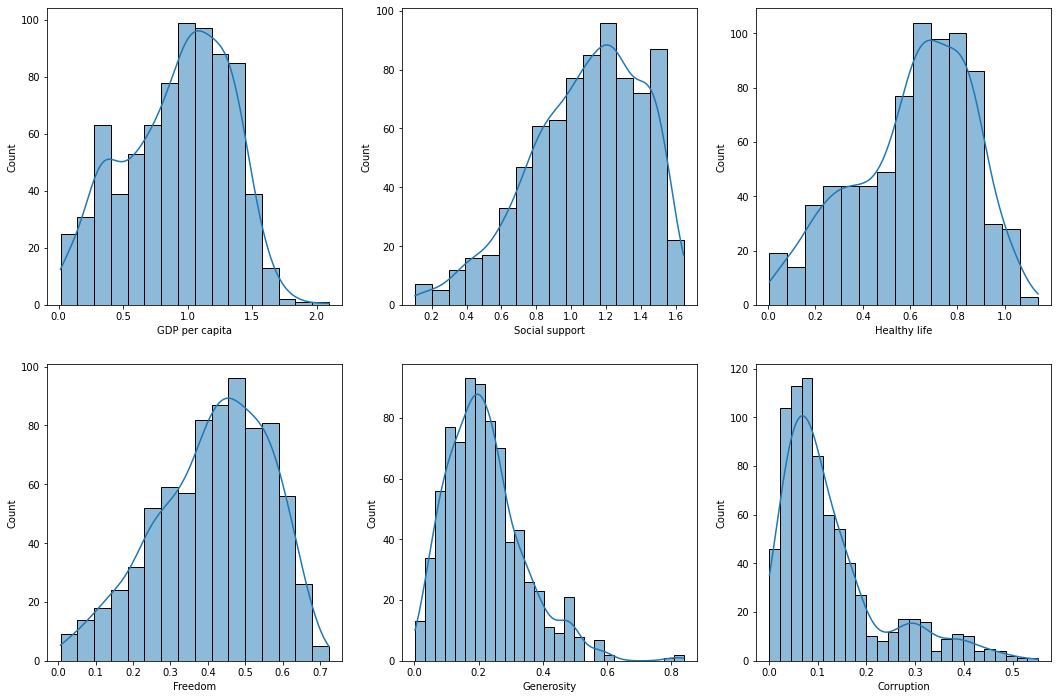

In [ ]:
plot , ax = plt.subplots(2 , 3 , figsize = (18 , 12))
g = sns.histplot(df['GDP per capita'] , kde = True , ax = ax[0][0])
g = sns.histplot(df['Social support'] , kde = True , ax = ax[0][1])
g = sns.histplot(df['Healthy life'] , kde = True , ax = ax[0][2])
g = sns.histplot(df['Freedom'] , kde = True , ax = ax[1][0])
g = sns.histplot(df['Generosity'] , kde = True , ax = ax[1][1])
g = sns.histplot(df['Corruption'] , kde = True , ax = ax[1][2])

**Observation:**
* GDP per Capita is somewhat following a Bi-Modal distribution peaking at 0.4 and 1
* Social support, Healthy life and Freedom are following Left-skewed distribution.
* Generosity and Corruption are following Right-skewed distribution.

### Ranges of Economic Indicators and Presence of Outliers

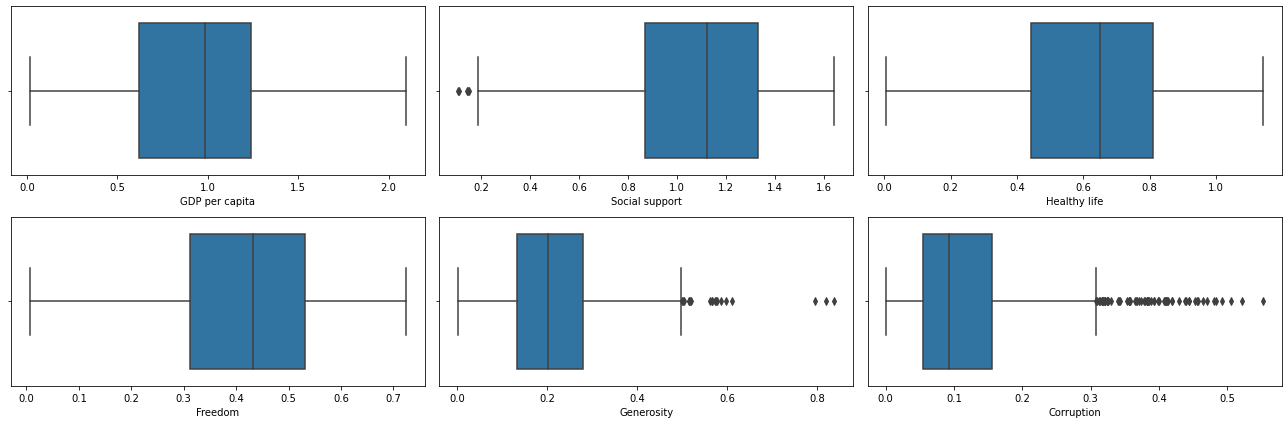

In [ ]:
fig, ax=plt.subplots(2,3, figsize=(18,6)) 
numeric_col=df.drop(columns='Happiness Score').select_dtypes('float64').columns
for num_col, axis in zip(numeric_col, ax.ravel()): 
    sns.boxplot(x=num_col, data=df, ax=axis)

plt.tight_layout() 

**Observation :**
* Some countries have low Social Support(below 0.2)
* Generosity and Corruption have some outliers having higher values.

### Correlation of the Economic Indicators with the Happiness Score

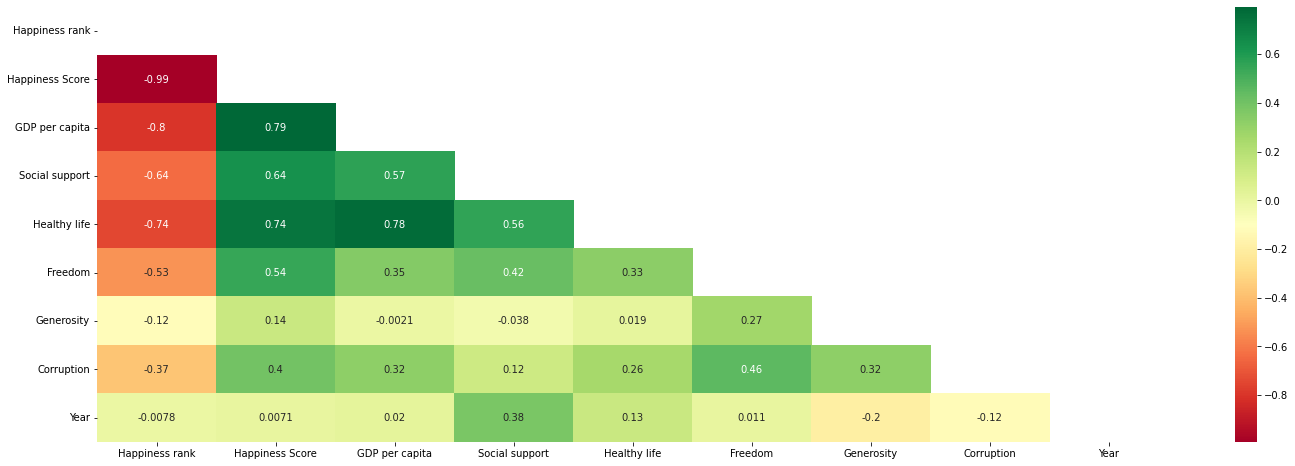

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(24,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn')

**Observation**:
GDP per capita and Healthy life have very high co-relation with Happiess Score, followed by Social Support and Freedom.

# AutoML - PyCaret
* PyCaret is an open-source low-code machine learning library in Python that aims to reduce the time needed for experimenting with different machine learning models.
* PyCaret empowers anyone to build low-code, powerful, end-to-end machine learning solutions.

In [ ]:
from pycaret.regression import *

### Setting upthe Regressor
* Setup the Target Label: Happiness Score
* Impute the Missing values using Iterative imputer(where the default model is LightGBM)
* Remove Features: Country and Happiness Rank
* Cross Validation: 5 folds Cross validation

In [ ]:
reg = setup(data = df, 
            target = 'Happiness Score',
            ignore_features=['Country','Happiness rank'],
            numeric_features=['GDP per capita','Social support', 'Healthy life', 'Freedom', 'Generosity', 'Corruption','Year'],            
            train_size=0.8,
            fold=5,
            imputation_type="iterative",
            silent = True)

Description                            Value
0                               session_id                             1358
1                                   Target                  Happiness Score
2                            Original Data                        (782, 10)
3                           Missing Values                             True
4                         Numeric Features                                7
5                     Categorical Features                                0
6                         Ordinal Features                            False
7                High Cardinality Features                            False
8                  High Cardinality Method                             None
9                    Transformed Train Set                         (625, 7)
10                    Transformed Test Set                         (157, 7)
11                      Shuffle Train-Test                             True
12                     Stratify Train-Test                            False
13                          Fold Generator                            KFold
14                             Fold Number                                5
15                                CPU Jobs                               -1
16                                 Use GPU                            False
17                          Log Experiment                            False
18                         Experiment Name                 reg-default-name
19                                     USI                             8489
20                         Imputation Type                        iterative
21          Iterative Imputation Iteration                                5
22                         Numeric Imputer                             mean
23      Iterative Imputation Numeric Model  Light Gradient Boosting Machine
24                     Categorical Imputer                         constant
25  Iterative Imputation Categorical Model  Light Gradient Boosting Machine
26           Unknown Categoricals Handling                   least_frequent
27                               Normalize                            False
28                        Normalize Method                             None
29                          Transformation                            False
30                   Transformation Method                             None
31                                     PCA                            False
32                              PCA Method                             None
33                          PCA Components                             None
34                     Ignore Low Variance                            False
35                     Combine Rare Levels                            False
36                    Rare Level Threshold                             None
37                         Numeric Binning                            False
38                         Remove Outliers                            False
39                      Outliers Threshold                             None
40                Remove Multicollinearity                            False
41             Multicollinearity Threshold                             None
42             Remove Perfect Collinearity                             True
43                              Clustering                            False
44                    Clustering Iteration                             None
45                     Polynomial Features                            False
46                       Polynomial Degree                             None
47                    Trignometry Features                            False
48                    Polynomial Threshold                             None
49                          Group Features                            False
50                       Feature Selection                            False
51                Feature Selection Method                          classic
52 

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['Country',
                                                       'Happiness rank'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['GDP per capita',
                                                          'Social support',
                                                          'Healthy life',
                                                          'Freedom',
                                                          'Generosity',
                                                          'Corruption',
                                                          '

### Evaluation Metrics
1. **Mean Absolute Error(MAE)** is a very simple metric which calculates the absolute difference between actual and predicted values.

2. **Mean Squared Error(MSE)** is a commonly used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

3. **Root Mean Squared Error(RMSE)** is a simple square root of mean squared error.

4. **R2 score** is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

5. **Root Mean Squared Log Error(RMSLE)** is the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

6. **Mean Absolute Percentage Error (MAPE)** is the sum of the individual absolute errors divided by the demand (each period separately). It is the average of the percentage errors.

### Model Evaluation and Comparison

In [ ]:
best_model=compare_models()

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.3727  0.2359  0.4850  0.8105   
rf                Random Forest Regressor  0.3878  0.2541  0.5025  0.7961   
lightgbm  Light Gradient Boosting Machine  0.3890  0.2557  0.5052  0.7946   
gbr           Gradient Boosting Regressor  0.4016  0.2656  0.5142  0.7868   
ridge                    Ridge Regression  0.4259  0.2936  0.5411  0.7640   
br                         Bayesian Ridge  0.4249  0.2937  0.5412  0.7640   
lr                      Linear Regression  0.4246  0.2939  0.5413  0.7638   
lar                Least Angle Regression  0.4246  0.2939  0.5413  0.7638   
huber                     Huber Regressor  0.4306  0.3103  0.5560  0.7510   
knn                 K Neighbors Regressor  0.4373  0.3147  0.5601  0.7474   
ada                    AdaBoost Regressor  0.4560  0.3182  0.5635  0.7434   
omp           Orthogonal Matching Pursuit  0.5519  0.4652  0.6808  0.6247   
dt                Decision Tree Regressor  0.5152  0.4785  0.6847  0.6152   
lasso                    Lasso Regression  0.9325  1.2561  1.1204 -0.0091   
en                            Elastic Net  0.9325  1.2561  1.1204 -0.0091   
llar         Lasso Least Angle Regression  0.9325  1.2561  1.1204 -0.0091   
dummy                     Dummy Regressor  0.9325  1.2561  1.1204 -0.0091   
par          Passive Aggressive Regressor  1.2885  2.5497  1.5197 -1.0752   

           RMSLE    MAPE  TT (Sec)  
et        0.0815  0.0749     0.234  
rf        0.0845  0.0780     0.326  
lightgbm  0.0846  0.0777     0.200  
gbr       0.0860  0.0803     0.118  
ridge     0.0899  0.0843     0.014  
br        0.0900  0.0842     0.016  
lr        0.0900  0.0841     0.622  
lar       0.0900  0.0841     0.014  
huber     0.0925  0.0858     0.040  
knn       0.0943  0.0888     0.022  
ada       0.0925  0.0895     0.112  
omp       0.1103  0.1077     0.018  
dt        0.1130  0.1013     0.020  
lasso     0.1809  0.1872     0.016  
en        0.1809  0.1872     0.016  
llar      0.1809  0.1872     0.016  
dummy     0.1809  0.1872     0.016  
par       0.2387  0.2771     0.018

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1358, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**Observation:**
* We can observe that Extra Trees Regressor is outperforming all the other models followed by Random Forest and Light GBM Regressor.
* We observe that on an average our predicted Hapiness Score is not off by more than 0.3727 for the best model.

### Hyperparameter Tuning

In [ ]:
tuned_model=tune_model(best_model)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4466  0.3064  0.5536  0.7452  0.0908  0.0868
1     0.4189  0.2740  0.5235  0.7656  0.0856  0.0814
2     0.4130  0.2827  0.5317  0.7871  0.0919  0.0861
3     0.4550  0.3253  0.5703  0.7559  0.0953  0.0917
4     0.3805  0.2441  0.4941  0.7956  0.0859  0.0804
Mean  0.4228  0.2865  0.5346  0.7699  0.0899  0.0853
Std   0.0265  0.0278  0.0261  0.0189  0.0037  0.0041

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features='sqrt', max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=5,
                    min_weight_fraction_leaf=0.0, n_estimators=290, n_jobs=-1,
                    oob_score=False, random_state=1358, verbose=0,
                    warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#Creating Models - Light GBM and Random Forest Regressor
lgbm  = create_model('lightgbm');          
rf  = create_model('rf'); 

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4360  0.3011  0.5487  0.7497  0.0900  0.0854
1     0.3582  0.2134  0.4620  0.8174  0.0766  0.0698
2     0.3789  0.2398  0.4897  0.8193  0.0843  0.0784
3     0.4269  0.3011  0.5487  0.7741  0.0923  0.0863
4     0.3392  0.2149  0.4636  0.8200  0.0791  0.0703
Mean  0.3878  0.2541  0.5025  0.7961  0.0845  0.0780
Std   0.0379  0.0395  0.0390  0.0290  0.0060  0.0071

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1358, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


### Blending Multiple Models
We will blend the top 3 performing models together: 
* Extra Trees Regressor
* Random Forest Regressor
* Light GBM Regressor

In [ ]:
blend = blend_models(estimator_list=[best_model,lgbm,rf])

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4016  0.2551  0.5051  0.7879  0.0831  0.0786
1     0.3557  0.2120  0.4605  0.8186  0.0761  0.0689
2     0.3718  0.2318  0.4815  0.8254  0.0826  0.0768
3     0.4095  0.2735  0.5230  0.7947  0.0879  0.0826
4     0.3407  0.2144  0.4630  0.8205  0.0789  0.0703
Mean  0.3758  0.2374  0.4866  0.8094  0.0817  0.0755
Std   0.0263  0.0238  0.0242  0.0151  0.0040  0.0051

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1

# Model Interpretability

### SHAP

* SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model

* The Shapley value is a method used in game theory that involves fairly distributing both gains and costs to actors working in a coalition.

* Since each actor contributes differently to the coalition, the Shapley value makes sure that each actor gets a fair share depending on how much they contribute.

In [ ]:
!pip install SHAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Installing support library
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
#Importing the training data from PyCaret Regressor
data=reg[22]

In [ ]:
X100 = shap.utils.sample(data, 100) # 100 instances for use as the background distribution

In [ ]:
explainer = shap.Explainer(blend.predict, X100)
shap_values = explainer(data)

Exact explainer: 626it [02:53,  3.38it/s]


### Beeswarm Plot
* For each variable, every instance of the dataset appears as it's own point, the points are distributed across the x-axis according to their SHAP values.
The input variables are ranked from the top in accordance to their mean SHAP values.

* Here GDP per capita is the top feature, followd by Healthy life and Social support.

* With increase in the GDP per Capita of a country, the Hapiness Score of the country Significantly increases.

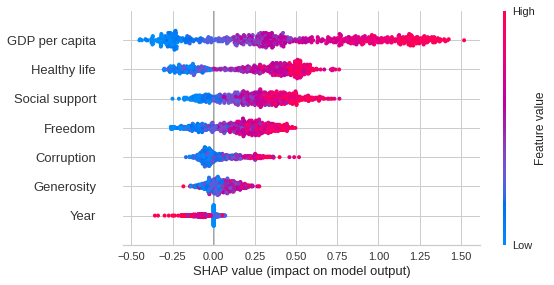

In [ ]:
shap.plots.beeswarm(shap_values)

### Bar Plot
Displaying the average SHAP values of each individual feature. 

**Observation:**
Here we see that GDP per capita of the Country is the most important Economic Indicator, affecting the Hapiness score on an average by 0.58.

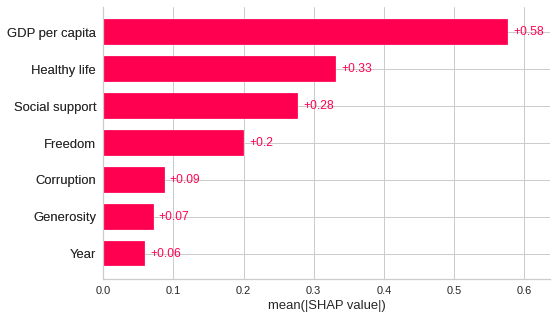

In [ ]:
shap.plots.bar(shap_values)

### Interpreting a particular instance using SHAP

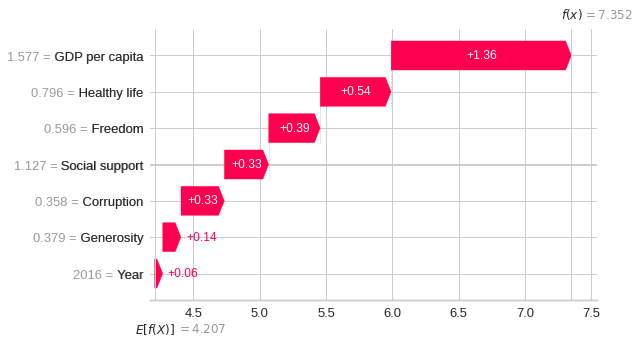

In [ ]:
shap.plots.waterfall(shap_values[25])

**Observation:**
Here, we can use an example and see how the predictor variables impact the Happiness Score of a country.
* The Predicted Happiness Score is 7.352
* Here GDP per Capita = 1.577 significantly increases the Happiness Score of a Country by 1.36. 
* Generosity doesn't have a significant impact and only increases the Happiness Score by 0.15

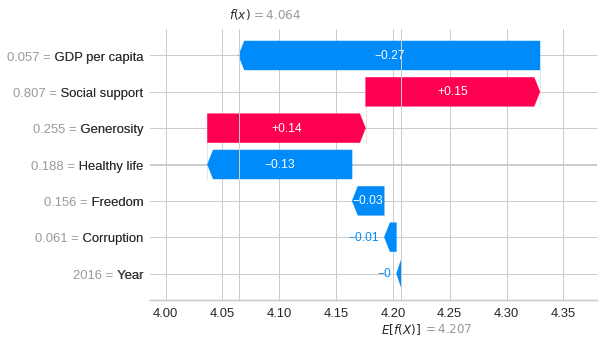

In [ ]:
shap.plots.waterfall(shap_values[30])

**Observation:**
Here, we can use an example and see how the predictor variables impact the Happiness Score of a country.
* The Predicted Happiness Score is 4.064
* Here GDP per Capita = 0.057 significantly decreases the Happiness Score of a Country by 0.27. 
* Social support increases the Happiness Score by 0.15

### LIME
* LIME is model-agnostic, meaning that it can be applied to any machine learning model. 
* The technique attempts to understand the model by perturbing the input of data samples and understanding how the predictions change.
* The output of LIME is a list of explanations, reflecting the contribution of each feature to the prediction of a data sample. This provides local interpretability, and it also allows to determine which feature changes will have most impact on the prediction.

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=55ddd4e10bba2c4312a87166dcb7ee1169d00f9fb9f01981ff885a23f16f9a56
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(data.values, feature_names=data.columns.values.tolist(), verbose=True, mode='regression')

In [ ]:
# LIME has one explainer for all the models
explainer = lime_tabular.LimeTabularExplainer(data.values, feature_names=data.columns.values.tolist(),
                                                  class_names=['Happiness Score'], verbose=True, mode='regression',discretize_continuous=False)

### Interpretating a single instance using LIME

In [ ]:
exp = explainer.explain_instance(data.iloc[25], blend.predict)

Intercept 5.291921009059576
Prediction_local [6.72259061]
Right: 7.3515289978783676


In [ ]:
exp.show_in_notebook(show_table=True)

**Observation:**
Here All the Economic Indicators have a posetive impact except Year.

In [ ]:
exp = explainer.explain_instance(data.iloc[30], blend.predict)

Intercept 5.265938709895804
Prediction_local [3.54659829]
Right: 4.064184218353854


In [ ]:
exp.show_in_notebook(show_table=True)

**Observation:**

Here even though Happiness Score is drastically low, All the Economic Indicators have a posetive impact except Year.


### LIME vs SHAP
While LIME grasps a single prediction, SHAP not only captures a global effect but also the Additive Effect.

In [ ]:
exp.show_in_notebook(show_table=True)

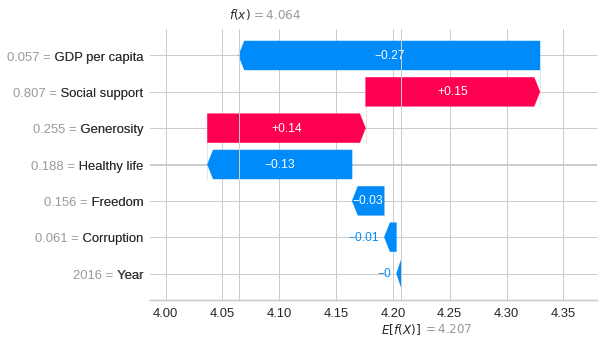

In [ ]:
shap.plots.waterfall(shap_values[30])

**Observation:**
* Here We can clearly observe that even though the Happiness Score is significantly low for the above example, LIME indicates a posetive contribution by most of the Economic Indicators, which is highly unlikely.
* However on the other hand SHAP is able to capture the negative effect of the Economic Indicators like GDP per capita and Healthy Life.
* Based on this Evidence, We can conclude that SHAP performs better on the above dataset as it is able to capture the Global and Additive effect unlike LIME.

# Conclusion
* We Explored the Economics of Happiness Dataset.
* Used AutoML library- Pycaret to evaluate and find the best model, tune and blend them.
* Compared SHAP and LIME model interpretability methods.

# License
**References**
* https://github.com/aiskunks/The_Economics_of_Happiness
* https://pycaret.readthedocs.io/en/stable/api/classification.html
* https://shap.readthedocs.io/en/latest/
* https://lime-ml.readthedocs.io/en/latest/

Copyright (c) 2022 chakraborty-arnab

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.